<a href="https://colab.research.google.com/github/Saibhossain/Neural_Networks-and-PyTorch/blob/main/League_of_Legends_Match_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project: League of Legends Match Predictor

League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios. Perform the following steps to build a logistic regression model aimed at predicting the outcomes of League of Legends matches.

In [24]:
!pip install pandas scikit-learn torch matplotlib

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

In [27]:
df = pd.read_csv("/content/league_of_legends_data_large.csv")


In [29]:
X = df.drop("win", axis=1)
y = df["win"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model class
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)         # Linear layer
        self.sigmoid = nn.Sigmoid()                   # Sigmoid activation

    def forward(self, x):
        return self.sigmoid(self.linear(x))           # Output in (0, 1) range

input_dim = X_train_tensor.shape[1]
# Step 2: Initialize the model
model = LogisticRegressionModel(input_dim)
# Step 3: Define the loss function (Binary Cross Entropy)
criterion = nn.BCELoss()
# Step 4: Define the optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.01)
# Test a forward pass (sanity check)
sample_output = model(X_train_tensor)
print("Sample Output (first 5 predictions):\n", sample_output[:5])

Sample Output (first 5 predictions):
 tensor([[0.4465],
        [0.2787],
        [0.4498],
        [0.5382],
        [0.2805]], grad_fn=<SliceBackward0>)


In [35]:
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()                                 # Set model to training mode
    optimizer.zero_grad()                         # Clear previous gradients
    outputs = model(X_train_tensor)               # Forward pass
    loss = criterion(outputs, y_train_tensor)     # Compute loss
    loss.backward()                               # Backpropagation
    optimizer.step()                              # Update weights
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [100/1000], Loss: 0.7310
Epoch [200/1000], Loss: 0.7138
Epoch [300/1000], Loss: 0.7030
Epoch [400/1000], Loss: 0.6962
Epoch [500/1000], Loss: 0.6920
Epoch [600/1000], Loss: 0.6894
Epoch [700/1000], Loss: 0.6878
Epoch [800/1000], Loss: 0.6869
Epoch [900/1000], Loss: 0.6862
Epoch [1000/1000], Loss: 0.6859


In [36]:
model.eval()
with torch.no_grad():
    train_preds = model(X_train_tensor)
    train_preds_class = (train_preds >= 0.5).float()   # Apply threshold
    test_preds = model(X_test_tensor)
    test_preds_class = (test_preds >= 0.5).float()     # Apply threshold
    train_accuracy = (train_preds_class == y_train_tensor).float().mean().item()
    test_accuracy = (test_preds_class == y_test_tensor).float().mean().item()
    print(f"\nTraining Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 55.75%
Test Accuracy: 52.50%


In [37]:
import torch.nn as nn
import torch.optim as optim
model = LogisticRegressionModel(input_dim)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
model.eval()
with torch.no_grad():
    train_preds = model(X_train_tensor)
    train_preds_class = (train_preds >= 0.5).float()
    test_preds = model(X_test_tensor)
    test_preds_class = (test_preds >= 0.5).float()
    train_accuracy = (train_preds_class == y_train_tensor).float().mean().item()
    test_accuracy = (test_preds_class == y_test_tensor).float().mean().item()
    print(f"\nTraining Accuracy with L2 Regularization: {train_accuracy * 100:.2f}%")
    print(f"Test Accuracy with L2 Regularization: {test_accuracy * 100:.2f}%")

Epoch [100/1000], Loss: 0.7242
Epoch [200/1000], Loss: 0.7088
Epoch [300/1000], Loss: 0.6995
Epoch [400/1000], Loss: 0.6938
Epoch [500/1000], Loss: 0.6904
Epoch [600/1000], Loss: 0.6884
Epoch [700/1000], Loss: 0.6872
Epoch [800/1000], Loss: 0.6864
Epoch [900/1000], Loss: 0.6860
Epoch [1000/1000], Loss: 0.6857

Training Accuracy with L2 Regularization: 55.00%
Test Accuracy with L2 Regularization: 53.00%


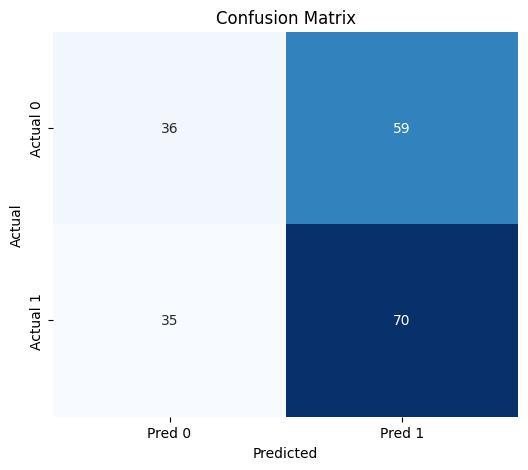

Classification Report:
              precision    recall  f1-score   support

           0     0.5070    0.3789    0.4337        95
           1     0.5426    0.6667    0.5983       105

    accuracy                         0.5300       200
   macro avg     0.5248    0.5228    0.5160       200
weighted avg     0.5257    0.5300    0.5201       200



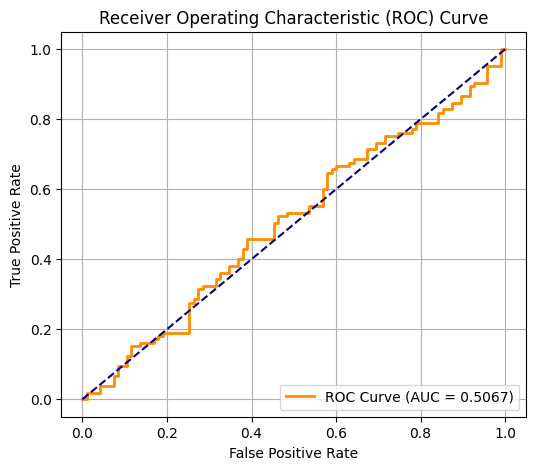

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
# Ensure model is in evaluation mode
model.eval()

with torch.no_grad():
    y_test_probs = model(X_test_tensor).numpy().flatten()            # Probabilities for ROC
    y_test_pred = (y_test_probs >= 0.5).astype(int)                  # Binary predictions
    y_test_true = y_test_tensor.numpy().astype(int).flatten()        # True labels
cm = confusion_matrix(y_test_true, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Classification Report:")
print(classification_report(y_test_true, y_test_pred, digits=4))
fpr, tpr, thresholds = roc_curve(y_test_true, y_test_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [40]:
torch.save(model.state_dict(), 'logistic_regression_model.pth')
print("Model saved successfully.")
loaded_model = LogisticRegressionModel(input_dim)
loaded_model.load_state_dict(torch.load('logistic_regression_model.pth'))
loaded_model.eval()
print("Model loaded and ready for evaluation.")
with torch.no_grad():
    y_loaded_probs = loaded_model(X_test_tensor).numpy().flatten()
    y_loaded_preds = (y_loaded_probs >= 0.5).astype(int)
    y_test_true = y_test_tensor.numpy().astype(int).flatten()
    accuracy_loaded = (y_loaded_preds == y_test_true).mean() * 100
    print(f"Accuracy of the loaded model on test data: {accuracy_loaded:.2f}%")

Model saved successfully.
Model loaded and ready for evaluation.
Accuracy of the loaded model on test data: 53.00%


In [41]:
learning_rates = [0.01, 0.05, 0.1]
num_epochs = 100
best_accuracy = 0
best_lr = None
results = {}
for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model = LogisticRegressionModel(input_dim)
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
    model.eval()
    with torch.no_grad():
        y_test_probs = model(X_test_tensor).numpy().flatten()
        y_test_preds = (y_test_probs >= 0.5).astype(int)
        y_test_true = y_test_tensor.numpy().astype(int).flatten()
        test_accuracy = (y_test_preds == y_test_true).mean() * 100
        results[lr] = test_accuracy
        print(f"Test Accuracy with learning rate {lr}: {test_accuracy:.2f}%")
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_lr = lr
print("\nSummary of Test Accuracies for Each Learning Rate:")
for lr, acc in results.items():
    print(f"Learning Rate {lr}: Test Accuracy = {acc:.2f}%")
print(f"\n✅ Best Learning Rate: {best_lr} with Test Accuracy = {best_accuracy:.2f}%")



Training with learning rate: 0.01
Test Accuracy with learning rate 0.01: 52.00%

Training with learning rate: 0.05
Test Accuracy with learning rate 0.05: 53.50%

Training with learning rate: 0.1
Test Accuracy with learning rate 0.1: 52.00%

Summary of Test Accuracies for Each Learning Rate:
Learning Rate 0.01: Test Accuracy = 52.00%
Learning Rate 0.05: Test Accuracy = 53.50%
Learning Rate 0.1: Test Accuracy = 52.00%

✅ Best Learning Rate: 0.05 with Test Accuracy = 53.50%


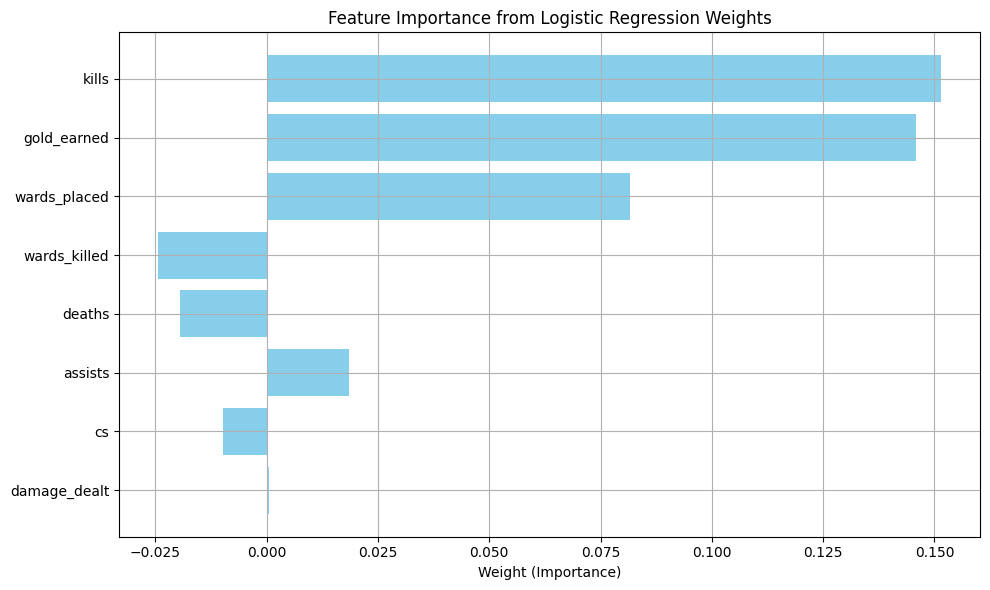

Top 5 Most Important Features:
        Feature    Weight  AbsWeight
0         kills  0.151446   0.151446
3   gold_earned  0.145830   0.145830
5  wards_placed  0.081592   0.081592
6  wards_killed -0.024376   0.024376
1        deaths -0.019515   0.019515


In [42]:
weights = model.linear.weight.data.numpy().flatten()  # shape: (num_features,)
import pandas as pd
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Weight': weights
})
feature_importance_df['AbsWeight'] = feature_importance_df['Weight'].abs()
feature_importance_df = feature_importance_df.sort_values(by='AbsWeight', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Weight'], color='skyblue')
plt.xlabel('Weight (Importance)')
plt.title('Feature Importance from Logistic Regression Weights')
plt.gca().invert_yaxis()  # Most important feature on top
plt.grid(True)
plt.tight_layout()
plt.show()
print("Top 5 Most Important Features:")
print(feature_importance_df.head(5))